In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from fuzzywuzzy import fuzz #conda install -c conda-forge fuzzywuzzy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #conda install -c conda-forge wordcloud
import plotly.graph_objects as go #conda install -c plotly plotly=4.7.1
from textblob import TextBlob #conda install -c conda-forge textblob



sns.set_palette("Set2")
tweets = pd.read_csv('data/train.csv').sort_values(by=['target'])
tweets

id       keyword                          location  \
3806   5408  fire%20truck                               NaN   
3444   4922      exploded                               USA   
3443   4920      exploded                  Elmwood Park, NJ   
6219   8875         smoke           3.28.15|7.20.15|7.25.15   
3440   4917      exploded                               NaN   
6220   8878         smoke               cigarknub@gmail.com   
3438   4914      exploded                            London   
3445   4923      exploded                               NaN   
3436   4912      exploded                    Trost District   
3434   4910       explode                               NaN   
3433   4909       explode                     New Hampshire   
3432   4908       explode                          Winnipeg   
3431   4906       explode                               NaN   
3430   4905       explode                               NaN   
3429   4903       explode                               NaN   
6222   8881         smoke                               NaN   
6217   8871         smoke                               NaN   
3447   4926      exploded                 South east of U.K   
3448   4929      exploded                               NaN   
3463   4954      exploded                           Germany   
6215   8866         smoke                        WORLDWI$E    
3461   4952      exploded                               NaN   
3460   4951      exploded                               NaN   
3459   4948      exploded  WonderlandÛÓ ?????? ???? ??????   
3458   4946      exploded                               NaN   
6216   8869         smoke                           atlanta   
3456   4944      exploded                           Jamaica   
3455   4943      exploded                   Antigua ?? NYC    
3454   4940      exploded                       Oakland, Ca   
3453   4938      exploded     lrhcthband;four - bournemouth   
...     ...           ...                               ...   
3644   5193    fatalities              oman muscat al seeb    
3642   5191    fatalities              Caserta-Roma, Italy    
3654   5203    fatalities                               NaN   
3641   5190    fatalities            St. John's, NL, Canada   
3638   5187    fatalities                    Youngstown, OH   
3637   5186    fatalities                               NaN   
3632   5181    fatalities                    Washington, DC   
3629   5178    fatalities                               NaN   
3628   5177    fatalities    Washington, DC & Charlotte, NC   
3626   5175    fatalities         #WashingtonState #Seattle   
3640   5189    fatalities                    Nantes, France   
3623   5171    fatalities         Wolverhampton/Brum/Jersey   
3656   5206    fatalities                  Philadelphia, PA   
3658   5208    fatalities                               NaN   
3714   5282          fear                    Midwestern USA   
3711   5278          fear                               NaN   
3695   5257      fatality                               NaN   
3692   5254      fatality        Bishops Stortford, England   
3691   5252      fatality                     Nashville, TN   
3688   5248      fatality                               NaN   
3657   5207    fatalities         Just Happy to Be Anywhere   
3679   5234      fatality                             U.S.A   
3671   5226      fatality                               NaN   
3669   5223      fatality                               NaN   
3668   5222      fatality             Boston Û¢ Cape Cod ?   
3663   5213      fatality                               NaN   
3660   5210    fatalities                           Ireland   
3659   5209    fatalities                        Lima, Ohio   
3673   5228      fatality                    Fort Wayne, IN   
7612  10873           NaN                               NaN   

                                                   text  target  
3806  Former Township fire truck bei

In [2]:
tweets_text = tweets.loc[:,['text','target']]
tweets_text['target_boolean'] = tweets_text['target']
tweets_text['target'] = tweets_text['target'].transform(lambda x: 'Real' if x == 1 else 'Falso')
tweets_text

text target  target_boolean
3806  Former Township fire truck being used in Phili...  Falso               0
3444  The Dress Memes Have Officially Exploded On Th...  Falso               0
3443  Well as I was chaning an iPad screen it fuckin...  Falso               0
6219  So does Austin smoke too since he agreed to th...  Falso               0
3440  Im Dead!!! My two Loves in 1 photo! My Heart e...  Falso               0
6220                Smoke it all http://t.co/79upYdCeMp  Falso               0
3438  A tin of Tesco dog food 'exploded' and prompte...  Falso               0
3445  My little heart just exploded #OTRAMETLIFE #MT...  Falso               0
3436  @CrimsonFuckingV @BitchL0veCannon Even you hav...  Falso               0
3434  Toronto going crazy for the blue jays. Can you...  Falso               0
3433  @DelDryden If I press on the twitch will my he...  Falso               0
3432       I'm ready to explode! http://t.co/OwJe3i6yGN  Falso               0
3431                           My head is gonna explode  Falso               0
3430  @Anonchimp think its a tie with thunderstorms ...  Falso               0
3429  Learn How I Gained Access To The Secrets Of Th...  Falso               0
6222  If you wanna smoke cigs that's your own proble...  Falso               0
6217                Be Trynna smoke TJ out but he a hoe  Falso               0
3447  Just saw The Man Whose Mind Exploded. There sh...  Falso               0
3448  I read about that break for hours before twitt...  Falso               0
3463  @lunasagalle @synapsenkotze \n'The Exploded - ...  Falso               0
6215  I smoke toooooo much lmao I was scared to text...  Falso               0
3461  that exploded &amp; brought about the\nbeginni...  Falso               0
3460  Yumiko jumped in surprise as the fire shot upw...  Falso               0
3459                           My head exploded i swear  Falso               0
3458  @MeryCormier haha! Exactly! Cosima is definite...  Falso               0
6216          @TheTshirtKid I'm tryna smoke that MF out  Falso               0
3456  @ItsNasB now I have to go replace my sarcasm m...  Falso               0
3455  Did this man just squeeze another man's head w...  Falso               0
3454  holy crap @KingMyth1999 my phone just exploded...  Falso               0
3453               luke + microphone = exploded ovaries  Falso               0
...                                                 ...    ...             ...
3644  I liked a @YouTube video http://t.co/43sXG9Z6x...   Real               1
3642  Govt allocating 1.3 bn for flood action: Issue...   Real               1
3654  No UK train accident fatalities for 8th year r...   Real               1
3641  The RCMP are reporting fatalities and serious ...   Real               1
3638  OSP concerned about mounting fatalities http:/...   Real               1
3637  -??-\n; kitana\n? her fatalities slay me\nÛÓk...   Real               1
3632  #Saudi Arabia: #Abha: Fatalities reported foll...   Real               1
3629  Injuries Illnesses and Fatalities Latest Numbe...   Real               1
3628  @unsuckdcmetro minor train leaves rails. Major...   Real               1
3626  #Seattle's deadliest red light runner intersec...   Real               1
3640  Estimated damage and fatalities of an Hiroshim...   Real               1
3623  Understand that there are no fatalities as no ...   Real               1
3656  PolicyLab is at @CECANF's last public hearing ...   Real               1
3658  #Shipping #Logistics eNCA | Fatalities as migr...   Real               1
3714  @CowgirlLawyer We must refuse to become a nati...   Real               1
3711  The Opposite of Love is Fear HereÛªs Why\nhtt...   Real               1
3695  Death of Loretta Fuddy responsible for authent...   Real               1
3692  @LindaSOCVAT @TfLBusAlerts Yes apparently. Rep...   Real               1
3691  Truck crash on 40w at US70 in Lebanon is a fat...   Real               1
3688                  

# Cuál es la distribución entre tweets Reales y Falsos? 

In [60]:
tweets_by_target = tweets_text.target.value_counts().reset_index()
tweets_by_target.head(2)

index  target
0  Falso    4342
1   Real    3271

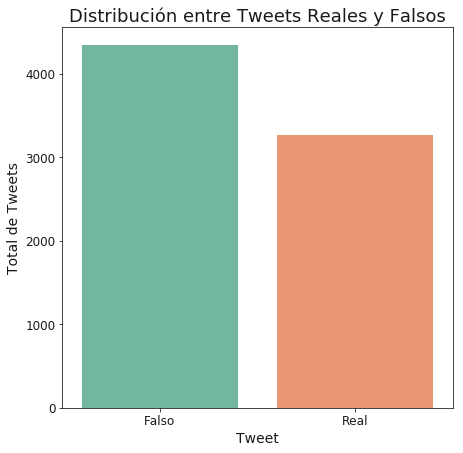

In [61]:
rcParams['figure.figsize'] = 7,7
ax = sns.barplot(data = tweets_by_target,x='index',y='target')
ax.set_title("Distribución entre Tweets Reales y Falsos",fontsize= 18)
ax.set_ylabel("Total de Tweets",fontsize= 14)
ax.set_xlabel("Tweet",fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# Relación cantidad de palabras del tweet y veracidad

Se indica para cada tweet cuantas palabras posee el texto

In [64]:
tweets_text['total_words'] = tweets_text.text.transform(lambda x: len(x.split(" ")))

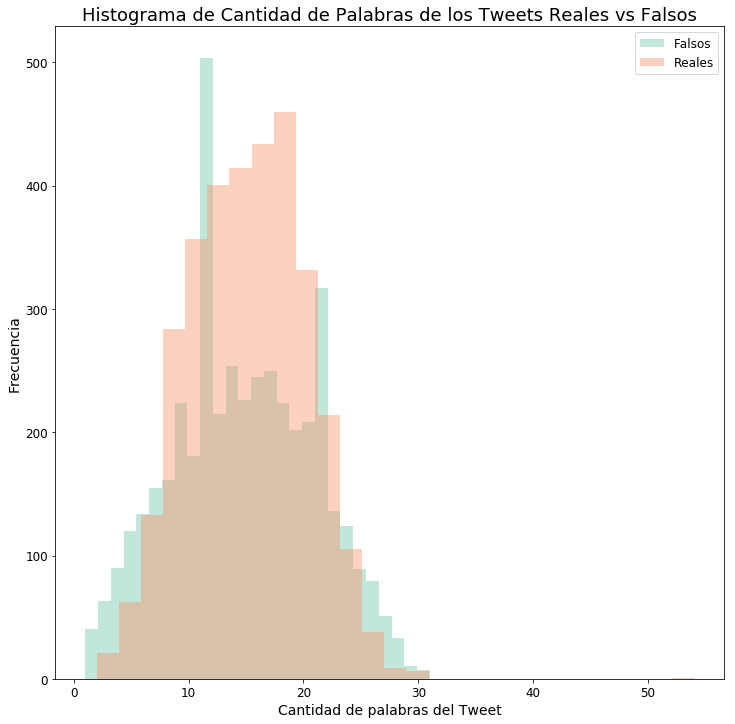

In [5]:
rcParams['figure.figsize'] = 12,12
total_bins = tweets_text.total_words.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_words'],  kde=False, label='Falsos',bins = total_bins)
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_words'],  kde=False, label='Reales', bins = total_bins)
plt.legend(prop={'size': 12})
plt.title("Histograma de Cantidad de Palabras de los Tweets Reales vs Falsos",fontsize= 18)
plt.xlabel("Cantidad de palabras del Tweet",fontsize= 14)
plt.ylabel('Frecuencia',fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# Relación entre la cantidad de caracteres y  veracidad del tweet

In [6]:
tweets_text['len_text'] = tweets_text.text.transform(lambda x: len(x))


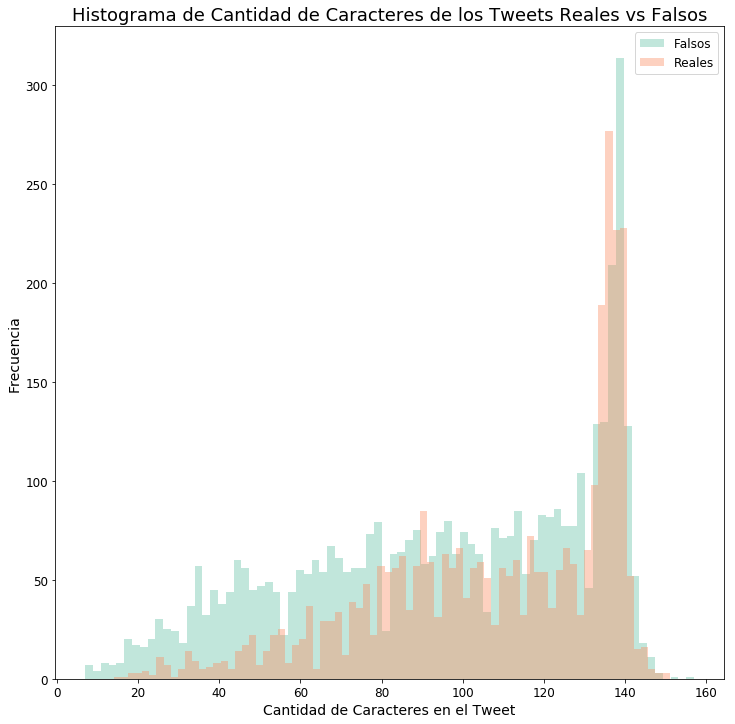

In [7]:
total_bins = tweets_text.len_text.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','len_text'],  kde=False, label='Falsos',bins = total_bins)
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','len_text'],  kde=False, label='Reales', bins = total_bins)
plt.legend(prop={'size': 12})
plt.title("Histograma de Cantidad de Caracteres de los Tweets Reales vs Falsos",fontsize= 18)
plt.xlabel("Cantidad de Caracteres en el Tweet",fontsize= 14)
plt.ylabel('Frecuencia',fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# ¿Existe diferencias entre las distribuciones de los tweets según su cantidad de palabras y longitud del texto?

In [8]:
tweets_text['len_text_normal'] = (tweets_text.len_text-tweets_text.len_text.mean()) /np.std(tweets_text.len_text)
tweets_text['total_words_normal'] = (tweets_text.total_words-tweets_text.total_words.mean()) /np.std(tweets_text.total_words)


Text(0.5,0,'Longitud de texto o catidad de palabras normalizado')

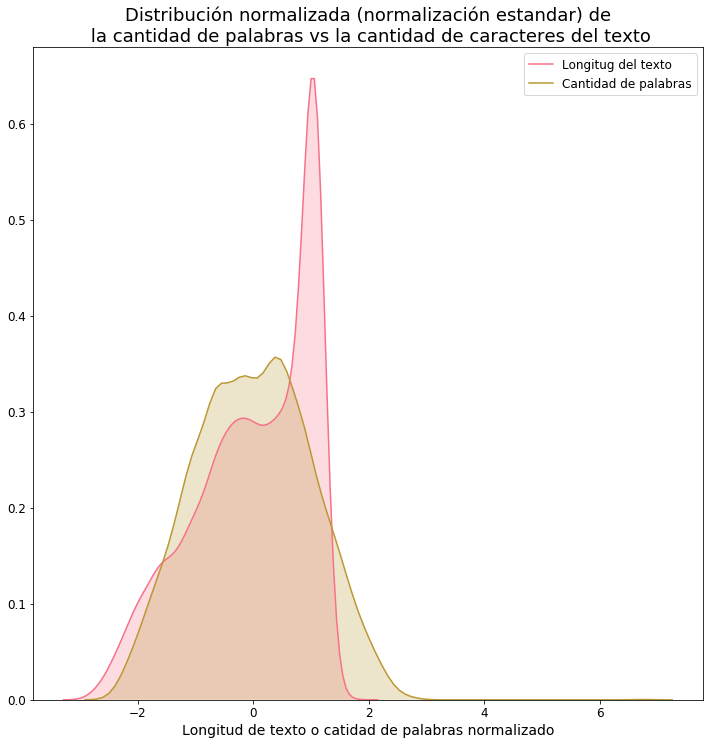

In [9]:
sns.set_palette("husl")
sns.kdeplot(tweets_text.len_text_normal, label='Longitug del texto',shade=True)
sns.kdeplot(tweets_text.total_words_normal, label='Cantidad de palabras',shade=True)
plt.legend(prop={'size': 12})
plt.title("Distribución normalizada (normalización estandar) de\n la cantidad de palabras vs la cantidad de caracteres del texto",fontsize=18)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)
plt.xlabel("Longitud de texto o catidad de palabras normalizado",fontsize= 14)




# Cuál es la correlación entre la cantidad de palabras del tweet y su longitud separados por target?

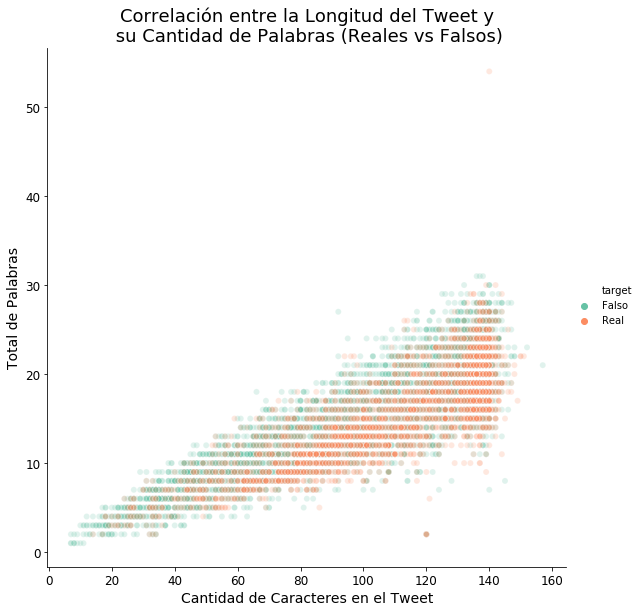

In [10]:
sns.set_palette("Set2")
scater = sns.relplot(y="total_words", x="len_text", hue="target", alpha=.2,height=8, data=tweets_text)
plt.title("Correlación entre la Longitud del Tweet y\n su Cantidad de Palabras (Reales vs Falsos)",fontsize= 18)
plt.xlabel("Cantidad de Caracteres en el Tweet",fontsize= 14)
plt.ylabel('Total de Palabras',fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# Relación entre la cantidad de caracteres de un tipo específico (mayusculas,numéricos y especiales) y la veracidad del tweet

In [11]:
#Recibe un string y devuelve la cantidad de caracteres en mayusculas que posee
def get_upper_total(s):
    total = 0
    for x in s:
        y = ord(x)
        if y > 90:
            continue
        if y > 64:
            total = total + 1
    return total

#Recibe un string y devuelve la cantidad de caracteres numéricos que posee
def get_total_numbers_chars(s):
    total = 0
    for x in s:
        y = ord(x)
        if y in range(48,58):
            total = total + 1
    return total
#Recibe un string y devuelve la cantidad de caracteres especiales que posee (excluye una lista de caracteres comunes)
def get_special_chars_total(s):
    total = 0
    common_esp_chr = [" ",".","?",",","!"]
    for x in s:
        y = ord(x)
        if y in range(97,123) or y in range(65,91) or y in range(48,58) or x in common_esp_chr:
            continue
        total = total + 1
    return total

Se obtiene para cada tweet la cantidad de caracteres en mayusculas que posee el texto

In [12]:
tweets_text['total_upper_chars'] = tweets_text.text.transform(lambda x: get_upper_total(x))

Se obtiene para cada tweet la cantidad de caracteres numéricos que posee el texto

In [13]:
tweets_text['total_numbers_chars'] = tweets_text.text.transform(lambda x: get_total_numbers_chars(x))

Se obtiene para cada tweet la cantidad de caracteres especiales que posee el texto (sin incluir los mas comunes)

In [14]:
tweets_text['total_special_chars'] = tweets_text.text.transform(lambda x: get_special_chars_total(x))

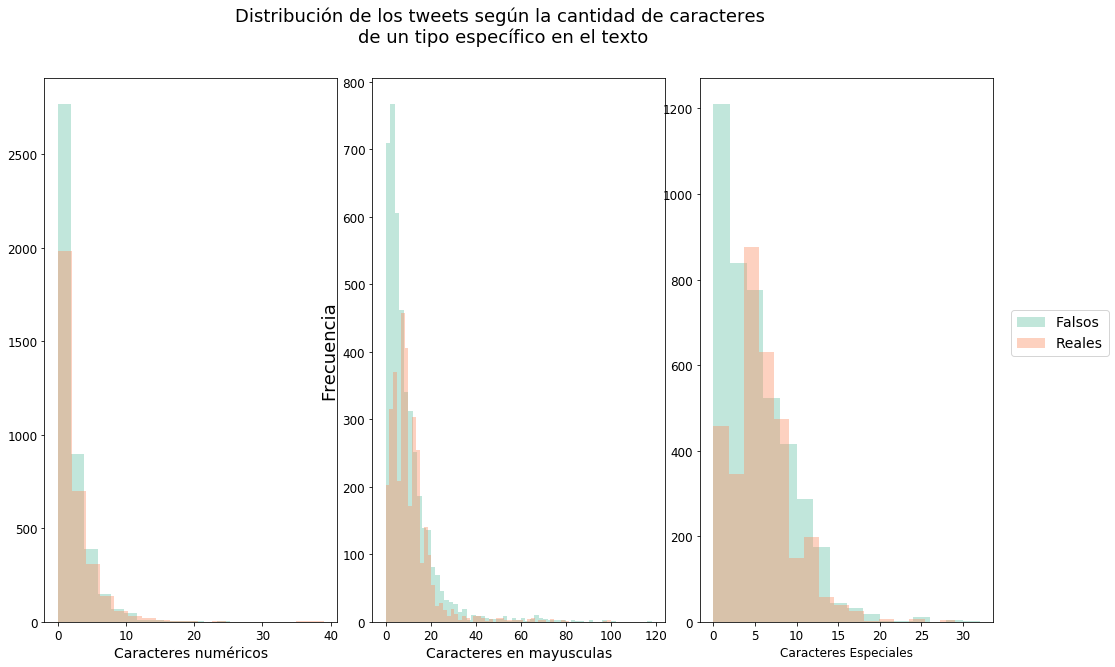

In [15]:

f, ax = plt.subplots(1, 3, figsize=(17,10),gridspec_kw={'wspace': 0.12})

total_bins = tweets_text.total_upper_chars.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_upper_chars'],  kde=False, label='Falsos',bins = total_bins,ax=ax[1])
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_upper_chars'],  kde=False, label='Reales', bins = total_bins,ax=ax[1])
ax[1].set_xlabel("Caracteres en mayusculas", fontsize=14)
ax[1].set_ylabel('Frecuencia', fontsize=18)



total_bins = tweets_text.total_numbers_chars.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_numbers_chars'],  kde=False, label='Falsos',bins = total_bins,ax=ax[0])
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_numbers_chars'],  kde=False, label='Reales', bins = total_bins,ax=ax[0])
ax[0].set_xlabel("Caracteres numéricos", fontsize=14)



total_bins = tweets_text.total_special_chars.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_special_chars'],  kde=False, label='Falsos',bins = total_bins,ax=ax[2])
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_special_chars'],  kde=False, label='Reales', bins = total_bins,ax=ax[2])
ax[2].set_xlabel("Caracteres Especiales", fontsize=12)

f.suptitle('Distribución de los tweets según la cantidad de caracteres \nde un tipo específico en el texto', fontsize=18)
f.legend(["Falsos","Reales"],prop={'size': 14},loc=5)
ax[0].tick_params(axis="y", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)
ax[2].tick_params(axis="y", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="x", labelsize=12)
ax[2].tick_params(axis="x", labelsize=12)


# ¿Incluyen los tweets elementos especiales como preguntas o enlaces ? como se distribuyen con relación al target

Indicamos para cada tweet si posee o no una pregunta (se asume que la posee si contiene el caracter "?")

In [16]:
tweets_text['contain_question'] = tweets_text.text.transform(lambda x: "?" in x)

Indicamos para cada tweet si posee o no un enlace (se asume que la posee si contiene "http")

In [17]:
tweets_text['contain_link'] = tweets_text.text.transform(lambda x: "http" in x)

Text(0.5,0.98,'Bar Plot del target de los tweets que contienen enlaces y preguntas')

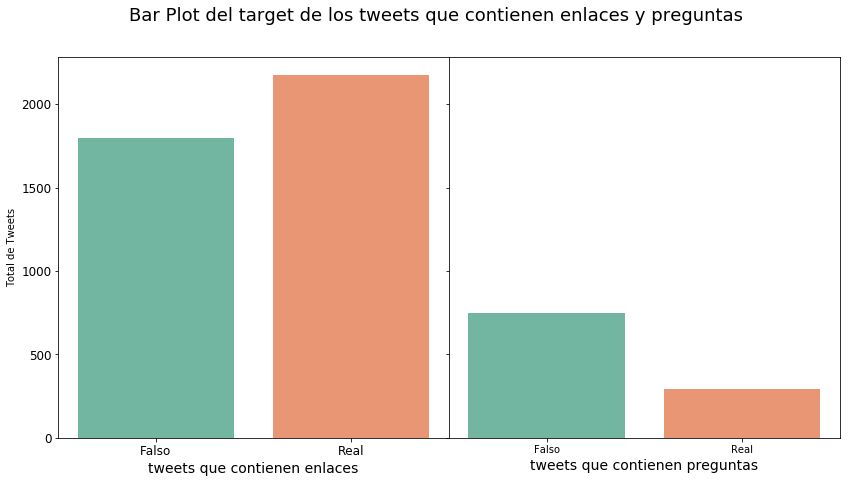

In [18]:
f, ax = plt.subplots(1, 2, figsize=(14,7),gridspec_kw={'wspace': 0})

sns.barplot(data = tweets_text.loc[tweets_text.contain_link == True].target.value_counts().reset_index().sort_values(by=['target']),x='index',y='target',ax=ax[0])
ax[0].set_ylabel("Total de Tweets")
ax[0].set_xlabel("tweets que contienen enlaces",fontsize=14)

sns.barplot(data = tweets_text.loc[tweets_text.contain_question == True].target.value_counts().reset_index(),x='index',y='target',ax=ax[1])
ax[1].set_xlabel("tweets que contienen preguntas",fontsize=14)

ax[0].label_outer()
ax[1].label_outer()
ax[1].set_ylim(ax[0].get_ylim())

ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="y", labelsize=12)


f.suptitle('Bar Plot del target de los tweets que contienen enlaces y preguntas', fontsize=18)


# Analisis del "sentimiento" del texto

La biblioteca de textblob posee una función que analiza el "sentimiento" de un texto, generando dos métricas llamadas polaridad y subjetividad. La primera es un float entre -1 y 1, para la cual mientras mas cerca del 1 este entonces es un sentimiento positivo (es más negativo mientras más se acerca al -1 y es más neutro cuanto más se acerque al 0). La segunda es un float entre 0 y 1, el sentimiento será más subjetivo cuanto mayor sea el valor.   

In [19]:
def subjectivityText(x):
  t=TextBlob(x)
  return t.sentiment.subjectivity
def polarityText(x):
  t=TextBlob(x)
  return t.sentiment.polarity

Se generan las columnas con su respectiva polaridad y subjetividad de cada texto

In [20]:
tweets_text["subjectivity_text"]=tweets_text.text.transform(subjectivityText)
tweets_text["polarity_text"]=tweets_text.text.transform(polarityText)


# ¿Cómo se distribuye la polaridad y la subjetividad de los textos diferenciados por target?

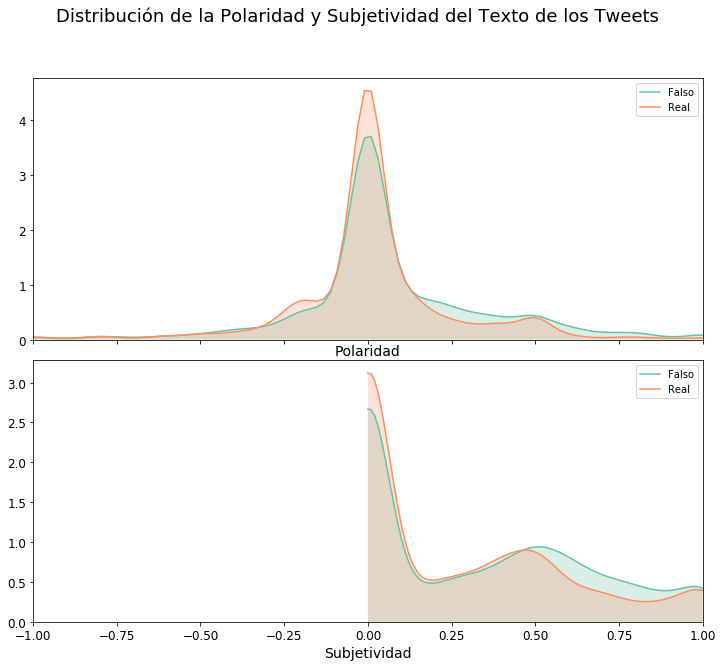

In [21]:
f, ax = plt.subplots(2, 1, figsize=(12,10),gridspec_kw={'hspace': 0.08})
sns.kdeplot(tweets_text.loc[tweets_text.target == 'Falso'].polarity_text, label='Falso',shade=True,ax=ax[0],cut=0)
sns.kdeplot(tweets_text.loc[tweets_text.target == 'Real'].polarity_text, label='Real',shade=True,ax=ax[0],cut=0)

sns.kdeplot(tweets_text.loc[tweets_text.target == 'Falso'].subjectivity_text, label='Falso',shade=True,ax=ax[1],cut=0)
sns.kdeplot(tweets_text.loc[tweets_text.target == 'Real'].subjectivity_text, label='Real',shade=True,ax=ax[1],cut=0)

f.suptitle('Distribución de la Polaridad y Subjetividad del Texto de los Tweets', fontsize=18)
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].label_outer()

ax[0].set_xlabel("Polaridad",fontsize=14)
ax[1].set_xlabel("Subjetividad",fontsize=14)

ax[0].tick_params(axis="y", labelsize=12)
ax[1].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)



#  ¿Se puede establecer un conjunto de palabras que dado un tweet que contenga al menos una, indique si es real o falso?


Para esto se hará un analsis de cada palabra en base a su frecuencia y longitud, el cual consistirá en buscar las palabras y su grado de veracidad (sobre aquellos tweets que contienen la palabra: porcentaje que son reales) 

Se crea un DataFrame con todas las palabras y sus frecuencias 

In [22]:
words = []
for x in tweets_text.text.tolist():
    for y in x.split(" "):
        words.append(y.lower())
df_words = pd.Series(words).value_counts().to_frame().reset_index()
df_words.columns = ['word','frecuency']

In [23]:
# Recibe las listas l1=[a1,a2,...,an] y l2=[b1,b2,...,bm] y las extiendea ambas a n x m elementos con la forma:
#  l1=[a1,...,a1,a2,...,a2,...,an,...,an] (m veces para cada elemento)
#  l2=[b1,b2,...,bm,b1,b2,...,bm] (n veces para cada m elementos)
#  Además devuelve una tercera lista con el producto cartesiano de las dos listas anteriores
def separate_cartesian_product_list(lenght_list, frecuency_list):
    first_list = lenght_list.copy()
    second_list = frecuency_list.copy()
    for x in range(len(second_list)-1):
        lenght_list.extend(first_list)
    lenght_list.sort()  
    for x in range(len(first_list)-1):
        frecuency_list.extend(second_list)
    
    third_list = []
    for x in first_list:
        for y in second_list:
            third_list.append((x,y))
    return third_list

In [24]:
#Se crean dos listas, la primera contiene todas las longitudes mínimas y la segunda contiene las frecuencias mínimas
#que se imponen para pertenecer al conjuto de palabras más frecuentes. 
#Se crea un dataframe donde cada registro determina un conjunto de palabras, ya que este contiene las variables antes 
#mencionadas y además una dupla con los mismos valores
word_lenght = list(range(1,10))
word_frecuency = list(range(10,140,5))

len_vs_fre = separate_cartesian_product_list(word_lenght,word_frecuency)
tweets_frec_len = pd.DataFrame({'lenght_min':word_lenght,'frecuency_min':word_frecuency, 'len_and_fre':len_vs_fre}) 


In [25]:
#Recibe un string y una colección de palabras, devuelve True en caso que al menos una de las palabras del string
#este contenida en la colección, Devuelve Falso para el caso contrario. 
def contain_long_words(s,long_words):
    for x in s.lower().split(" "):
        if x in long_words:
            return True
    return False

In [26]:
#Recibe una dupla de elementos: (longitud min,frecuencia min). devuelve el porcentaje de tweets reales de aquellos
#que continen al menos una palabra del conjunto de palabras mas frecuentes determinados por longitud min y frecuencia min
def get_true_percentage(x):
    long_words = df_words.loc[df_words['word'].transform(lambda y: len(y) >=  x[0])].loc[df_words.frecuency >= x[1],'word'].tolist()
    tweets_text['contain_long_word'] = tweets_text['text'].transform(lambda y: contain_long_words(y,long_words))
    tweets_contain_long_words = tweets_text.loc[tweets_text.contain_long_word == True,:]
    total_true =tweets_contain_long_words.loc[tweets_text.target == 'Real','target'].count()
    total_False = tweets_contain_long_words.loc[tweets_text.target == 'Falso','target'].count()

    return total_true*100/(total_true +total_False)

El siguiente dataframe indica los porcentajes de tweets reales de aquellos que por lo menos una de sus palabras se encuentran en las palabras más frecuentes de logintud min y frecuencia min especificados

In [27]:
tweets_frec_len['true_percentage'] = tweets_frec_len['len_and_fre'].transform(lambda x: get_true_percentage(x)) 
data_for_heatmap =tweets_frec_len.drop(columns=['len_and_fre']).set_index(['frecuency_min','lenght_min']).unstack()
data_for_heatmap.columns = list(range(1,10))



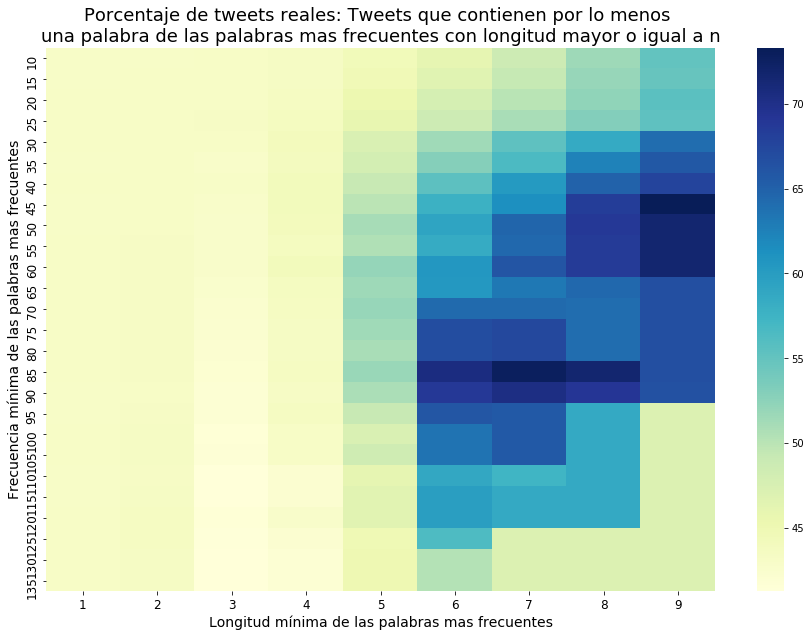

In [28]:
rcParams['figure.figsize'] = 15,10
heatmap = sns.heatmap(data_for_heatmap,cmap="YlGnBu")
heatmap.set_title("Porcentaje de tweets reales: Tweets que contienen por lo menos \nuna palabra de las palabras mas frecuentes con longitud mayor o igual a n",fontsize= 18)
heatmap.set_xlabel("Longitud mínima de las palabras mas frecuentes",fontsize= 14)
heatmap.set_ylabel("Frecuencia mínima de las palabras mas frecuentes",fontsize= 14)
heatmap.tick_params(axis="y", labelsize=12)
heatmap.tick_params(axis="x", labelsize=12)


In [29]:
def get_true_pertentage_word(x):
    x_list = []
    x_list.append(x)
    tweets_text['contain_long_word'] = tweets_text['text'].transform(lambda y: contain_long_words(y,x_list))
    tweets_contain_long_words = tweets_text.loc[tweets_text.contain_long_word == True,:]
    total_true =tweets_contain_long_words.loc[tweets_text.target == 'Real','target'].count()
    total_False = tweets_contain_long_words.loc[tweets_text.target == 'Falso','target'].count()
    if (total_true +total_False) == False:
        print(x)
        print(tweets_contain_long_words)
    return total_true*100/(total_true +total_False),total_true

In [30]:
words_set = pd.DataFrame(df_words.loc[df_words['word'].transform(lambda y: len(y) >=  5)].loc[df_words.frecuency >= 30,'word'].tolist())
words_set['percentage_true'] = words_set[0].transform(lambda x: get_true_pertentage_word(x))
words_set['total_tweets_true'] = words_set['percentage_true'].transform(lambda x: x[1]).astype('int')
words_set['percentage_true'] = words_set['percentage_true'].transform(lambda x: x[0]).astype('int')


Se toman las palabras tienen más de un 75% de veracidad y que haya más de 30 de estos (este sería el conjunto de palabras buscados)

In [62]:
best_words = words_set.loc[words_set.percentage_true > 75].loc[words_set.total_tweets_true >30][0].tolist()
best_words

['suicide',
 'killed',
 'california',
 'families',
 'train',
 'crash',
 'fires',
 'accident',
 'bombing',
 'fatal',
 'northern',
 'bomber',
 'hiroshima',
 'obama',
 'atomic',
 'homes',
 'forest',
 'wildfire',
 'found',
 'debris',
 'severe',
 'malaysia',
 'evacuation',
 'injured',
 'spill',
 'warning',
 'japan',
 'missing',
 'mh370:',
 'wreckage',
 'thunderstorm',
 'migrants',
 'outbreak',
 'saudi',
 'investigators',
 'kills',
 'anniversary',
 'hundreds',
 'rescuers',
 'affected',
 'reunion',
 'latest:',
 'detonated',
 "legionnaires'"]

Se indica a cada tweet si contiene o no al menos una palabra de esta "bolsa de palabras"

In [32]:
tweets_text['contain_long_word'] = tweets_text['text'].transform(lambda y: contain_long_words(y,best_words))

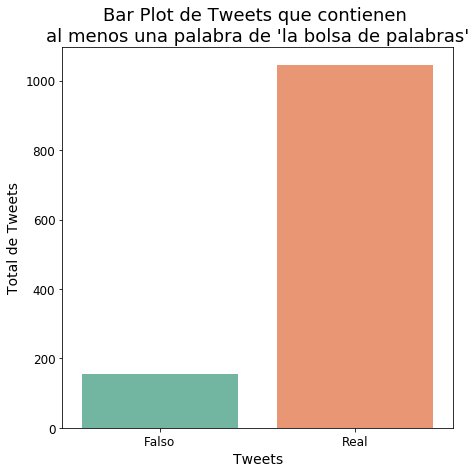

In [33]:
rcParams['figure.figsize'] = 7,7
ax = sns.barplot(data = tweets_text.loc[tweets_text['contain_long_word'] == True].target.value_counts().reset_index().sort_values(by=['target']),x='index',y='target')
ax.set_title("Bar Plot de Tweets que contienen \nal menos una palabra de 'la bolsa de palabras'",fontsize= 18)
ax.set_ylabel("Total de Tweets",fontsize= 14)
ax.set_xlabel("Tweets",fontsize= 14)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="x", labelsize=12)


# ¿Cuales son los Keywords de tweets reales con mayor frecuencia ?

In [34]:
tweets_text_key = tweets.loc[:,['text','keyword','target']].dropna()

Agrupación de keyword por similitud

In [35]:
#Recibe una lista de keywords y regresa un diccionario cuyas claves son los elementos de la lista pasada y los valores
#son las keywords agrupadas que las representa
def get_keyword_dic(key_list):
    key_dic = {}
    unique_list = []
    for x in key_list:
        z = x
        if "%20" in x:
            z = " ".join(x.split("%20"))
        similarity = 0
        value = ""
        for y in unique_list:
            ratio = fuzz.ratio(z,y)
            if ratio > similarity:
                similarity = ratio
                value = y
        if similarity > 75:
            key_dic[x] = value
        else:
            key_dic[x] = z
            unique_list.append(z)
    return key_dic
key_grouped = get_keyword_dic(tweets_text_key.keyword.tolist())

Agrupoamiento manual

In [36]:
key_grouped['blazing'] = 'ablaze'
key_grouped['bleeding'] = 'blood'
key_grouped['buildings%20on%20fire'] = 'buildings burning'
key_grouped['burning%20buildings'] = 'buildings burning'
key_grouped['burning'] = 'burned'
key_grouped['dead'] = 'death'
key_grouped['demolition'] = 'demolish'
key_grouped['destruction'] = 'destroy'
key_grouped['explosion'] = 'explode'
key_grouped['flood'] = 'flooding'
key_grouped['floods'] = 'flooding'
key_grouped['inundated'] = 'inundation'
key_grouped['panic'] = 'panicking'
key_grouped['rainstorm'] = 'rainstorm'
key_grouped['riot'] = 'rioting'
key_grouped['screaming'] = 'screamed'
key_grouped['snowstorm'] = 'snowstorm'
key_grouped['survivors'] = 'survive'
key_grouped['traumatised'] = 'trauma'
key_grouped['violent%20storm'] = 'storm'
key_grouped['windstorm'] = 'storm'
key_grouped['traumatised'] = 'trauma'

tweets_text_key['keyword_grouped'] = tweets_text_key.keyword.transform(lambda x: key_grouped[x])


 Visualización wordcloud de las keywords categóricas

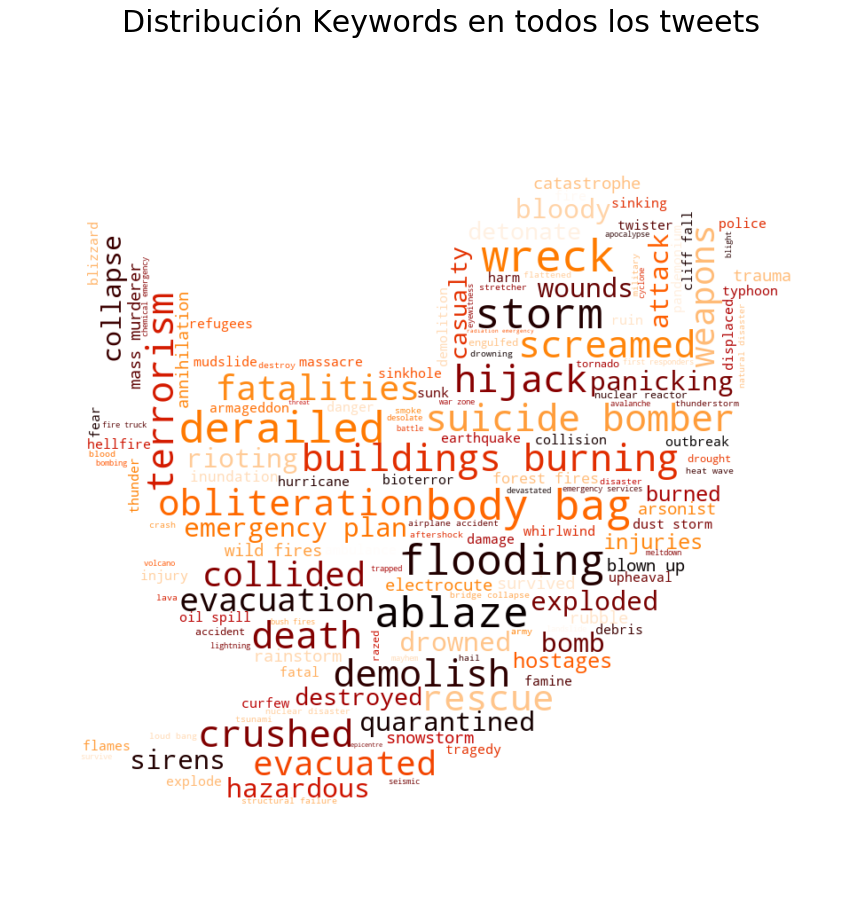

In [37]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

keywords_count = tweets_text_key.keyword_grouped.value_counts()
keywords_count.index = keywords_count.index.map(str)

mask = np.array(Image.open("./img/twitter_black.png"))
mask_transformed = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    mask_transformed[i] = list(map(transform_format, mask[i]))

wordcloud = WordCloud(max_font_size=50, max_words=200, random_state=42, 
                      background_color='white', colormap='gist_heat',
                      mask=mask_transformed)
wordcloud.generate_from_frequencies(keywords_count)

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribución Keywords en todos los tweets", fontsize=30, pad=40)
plt.axis("off")
plt.show()

Porcentaje de verdaderos y falsos por cada keyword¶


In [38]:
keywords_grouped = tweets_text_key.groupby(['keyword_grouped', 'target']).agg({'keyword_grouped':['count']})
keywords_level1 = keywords_grouped.columns.get_level_values(1)
keywords_grouped.columns = keywords_level1
keywords_grouped.reset_index(inplace=True)
keywords_grouped.head(10)

keyword_grouped  target  count
0             ablaze       0     89
1             ablaze       1     19
2           accident       0     11
3           accident       1     24
4         aftershock       0     34
5  airplane accident       0      5
6  airplane accident       1     30
7          ambulance       0     18
8          ambulance       1     20
9       annihilation       0     42

In [39]:
keywords_total_count = tweets_text_key.groupby(['keyword_grouped']).agg({'keyword_grouped': ['count']})
keywords_total_count.columns = 'total_' + keywords_total_count.columns.get_level_values(1)
keywords_total_count.reset_index(inplace=True)
keywords_total_count.head(10)

keyword_grouped  total_count
0             ablaze          108
1           accident           35
2         aftershock           34
3  airplane accident           35
4          ambulance           38
5       annihilation           63
6         apocalypse           32
7         armageddon           42
8               army           34
9           arsonist           66

In [40]:
keywords = keywords_grouped.merge(keywords_total_count, left_on='keyword_grouped', right_on='keyword_grouped', how='left')
keywords.loc[:,'percentage_count'] = (keywords.loc[:, 'count'] / keywords.loc[:, 'total_count']) * 100
keywords.head(10)

keyword_grouped  target  count  total_count  percentage_count
0             ablaze       0     89          108         82.407407
1             ablaze       1     19          108         17.592593
2           accident       0     11           35         31.428571
3           accident       1     24           35         68.571429
4         aftershock       0     34           34        100.000000
5  airplane accident       0      5           35         14.285714
6  airplane accident       1     30           35         85.714286
7          ambulance       0     18           38         47.368421
8          ambulance       1     20           38         52.631579
9       annihilation       0     42           63         66.666667

# Keywords tweets más acertados, tomando como > 90% targeted y frecuencia mayor a 10 (Verdadero)


In [41]:
targeted_keywords = keywords.loc[(keywords['percentage_count'] > 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 1)]
targeted_keywords

keyword_grouped  target  count  total_count  percentage_count
42            bombing       1     27           29         93.103448
79             debris       1     37           37        100.000000
199  nuclear disaster       1     31           34         91.176471
205         oil spill       1     37           38         97.368421
207          outbreak       1     39           40         97.500000
253    suicide bomber       1     94           99         94.949495
281           typhoon       1     37           38         97.368421

Text(0,0.5,'Keyword')

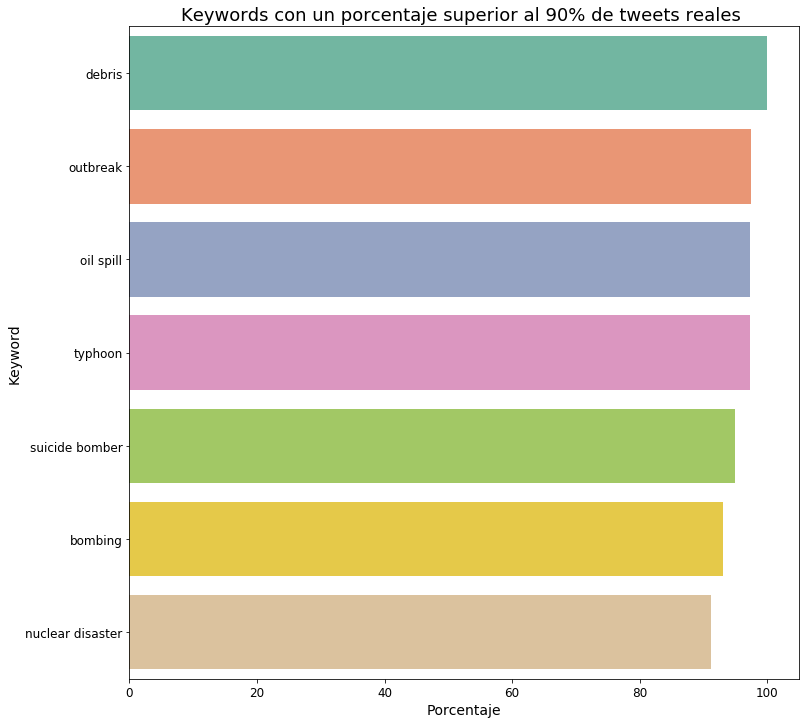

In [42]:
targeted_keywords = targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=targeted_keywords['percentage_count'], y=targeted_keywords['keyword_grouped'],
               orient='h')

g.set_title('Keywords con un porcentaje superior al 90% de tweets reales ', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Keyword', fontsize=14)

# Keywords de tweets menos acertados, tomando como > 90% not targeted y frecuencia mayor a 10 (Falsos)


In [43]:
not_targeted_keywords = keywords.loc[(keywords['percentage_count'] > 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 0)]
not_targeted_keywords

keyword_grouped  target  count  total_count  percentage_count
4        aftershock       0     34           34        100.000000
27           blight       0     30           32         93.750000
37         body bag       0    100          107         93.457944
120       epicentre       0     11           12         91.666667
156            harm       0     37           41         90.243902
210       panicking       0     65           70         92.857143
230            ruin       0     36           37         97.297297
242           smoke       0     31           34         91.176471
248       stretcher       0     30           33         90.909091

Text(0,0.5,'Keyword')

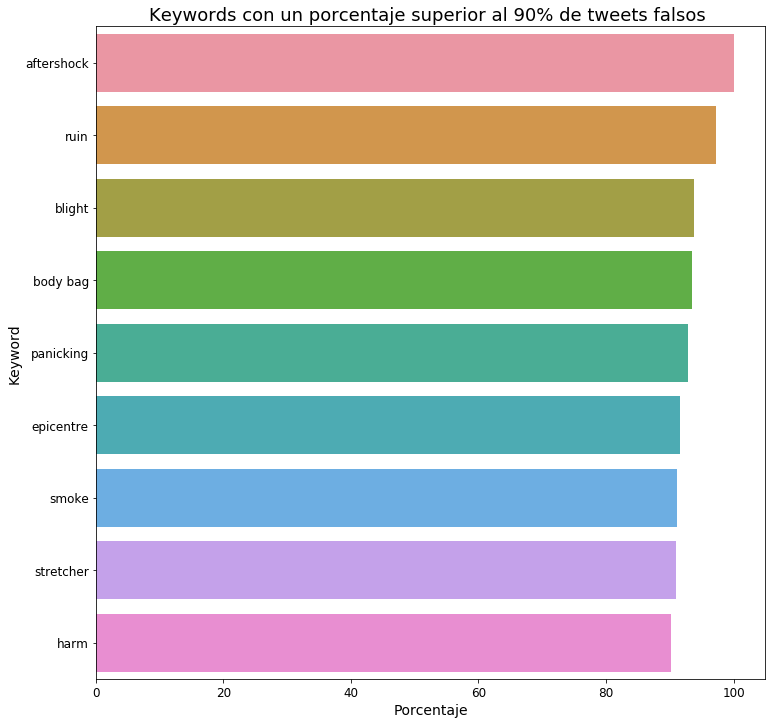

In [44]:
not_targeted_keywords = not_targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=not_targeted_keywords['percentage_count'], y=not_targeted_keywords['keyword_grouped'],
               orient='h')

g.set_title('Keywords con un porcentaje superior al 90% de tweets falsos ', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Keyword', fontsize=14)

# Cómo varían los resultados anteriores relacionado al texto para el top 15 de desastres con más tweets?

Se agrupan algunas de las keyword y solo nos quedamos con el top15 (por cantidad de tweets)

In [45]:
key_list_top = tweets_text_key.keyword_grouped.value_counts().nlargest(15).index
tweets_text_key['keyword_top'] = tweets_text_key.keyword_grouped.transform(lambda x: x in key_list_top)
tweets_text_key_top = tweets_text_key.loc[tweets_text_key.keyword_top].copy()
tweets_text_key_top


text    keyword  target  \
6258                                    FINALLY a storm      storm       0   
6259  #gamefeed Warcraft 3-Inspired Mode Likely Hitt...      storm       0   
6262                  omfg.... I just woke up again....      storm       0   
6263  New on Ebay UK Star Wars Storm Trooper Pop! Vi...      storm       0   
6267  RT @tonyhsieh: 'The person who dances with you...      storm       0   
6268  The Secrets Of The Storm Vortex The Lightning ...      storm       0   
6272  It's okay I welcome the rain. \nGave you all t...      storm       0   
6273  Nike Golf Storm Fit Golf Jacket Black Medium h...      storm       0   
6274  Every time I buy a bag for life I think I've g...      storm       0   
6276  New item: Pillow Covers ANY SIZE Pillow Cover ...      storm       0   
6277                                     this storm????      storm       0   
6278       @johngreen storm and silence by @RobThier_EN      storm       0   
6279  A Warcraft 3-inspired mode is likely coming to...      storm       0   
6282  Finna storm. Fuck my back boutta start hurting...      storm       0   
6285    ice cream + cupcake wars + storm = content sara      storm       0   
6287  The sky's clear the storm has passed but it's ...      storm       0   
6288  Happy birthday @lesley_mariiee ?? I miss you s...      storm       0   
6608  Does this apply to Muslims/terrorism?\nOr Cath...  terrorism       0   
6602  Truth...\nhttps://t.co/beJfTYgJIL\n#News\n#BBC...  terrorism       0   
6603  OMEGA MEN Writer Explores Terrorism Religion I...  terrorism       0   
6615  OMEGA MEN Writer Explores Terrorism Religion I...  terrorism       0   
6614  In #islam saving a person is equal in reward t...  terrorism       0   
6612  Domestic terrorism. No ifs ands or buts about ...  terrorism       0   
6594  Truth...\nhttps://t.co/h6amECX5K7\n#News\n#BBC...  terrorism       0   
6640                       Seek help warra #MetroFmTalk  terrorist       0   
6645  @ShipsXAnchors IDEK HOW IS  THERE PEOPLE WHO A...  terrorist       0   
6646  You May Know Me from Such Roles as Terrorist #...  terrorist       0   
6648  @BarackObama Senator John McCainÛªs Whoops Mo...  terrorist       0   
6658  Don't say @ALIPAPER: women got problems this #...  terrorist       0   
2436  So derailed_benchmark is cool for paths. i won...   derailed       0   
...                                                 ...        ...     ...   
3916  Homecoming Queen Killed on Way Home from the P...      flood       1   
3915  A [small] flood with bigåÊconsequences https:/...      flood       1   
3913  Spot Flood Combo 53inch 300W Curved Cree LED W...      flood       1   
3912  JKL cancels Flash Flood Warning for Bell Harla...      flood       1   
3984  Slip Sliding Away - Flash Floods Info for Writ...     floods       1   
3986  Myanmar Flooding: Heavy monsoon rains during t...     floods       1   
4006  PAGASA 7:12am: YELLOW warning - Panay Island G...     floods       1   
4005  APC Chieftain Tasks Dickson On N15b Floods Don...     floods       1   
4003  Bamenda Floods Kill Animals Birds - http://t.c...     floods       1   
4002  @ContactEnergy Yep. During floods of 1999 or 2...     floods       1   
4000  @casewrites when it rains in NJ it flash flood...     floods       1   
3999  Typhoon Soudelor approaches after 7 killed 2 m...     floods       1   
4007  RT: 40HourFamine: In #Bangladesh government ha...     floods       1   
3998  69 Dead Due to Floods in Myanmar: Naypyidaw Au...     floods       1   
3993  Disaster group stunned by floods http://t.co/j...     floods       1   
3992  @Cyberdemon531 i hope that mountain dew erodes...     floods       1   
3990  Granted like half my town floods when it rains...     floods       1   
3989  @ictyosaur I never thought it would be a wtf m...     floods       1   
3988  @pmharper don't worry I'm sure climate has not...     floods       1   
3987  In #India 119000 people have taken shelter in ...     floods       

# Existen preguntas en los tweets del top 15 por tipo de desastre? como se relacionan estas con su veracidad

In [46]:
tweets_text_key_top['contain_question'] = tweets_text_key_top.text.transform(lambda x: "?" in x)

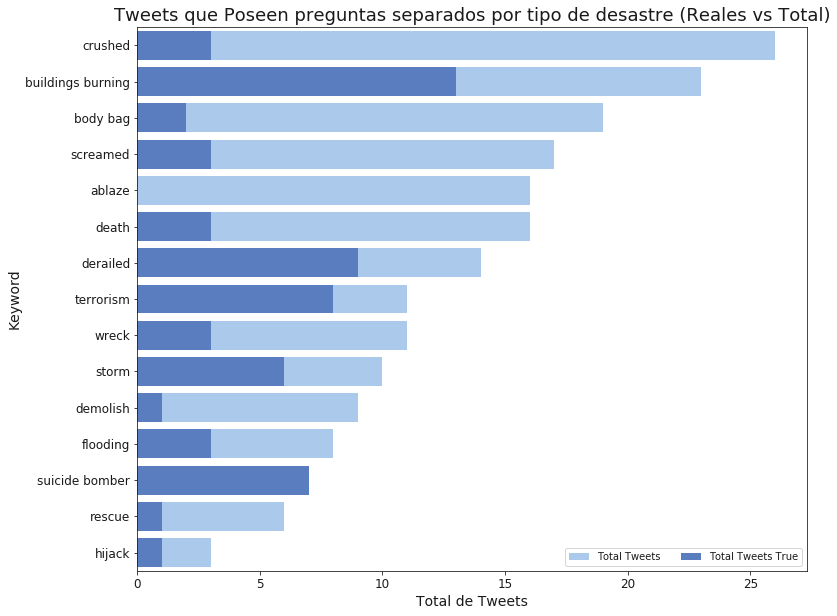

In [47]:
rcParams['figure.figsize'] = 12,10

sns.set_color_codes("pastel")
data= tweets_text_key_top.loc[tweets_text_key_top.contain_question == True].groupby(['keyword_grouped']).agg({'text':['count'],'target':['sum']}).reset_index().sort_values(by=('text','count'),ascending=False)
sns.barplot(data = data,y='keyword_grouped',x=('text','count'), color="b",label= 'Total Tweets')

sns.set_color_codes("muted")
ax = sns.barplot(data = data,y='keyword_grouped',x=('target','sum'), color="b",label= 'Total Tweets True')
ax.set_title("Tweets que Poseen preguntas separados por tipo de desastre (Reales vs Total)",fontsize= 18)
ax.set_xlabel("Total de Tweets", fontsize= 14)
ax.set_ylabel("Keyword",fontsize= 14)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="x", labelsize=12)


# Cómo se relaciona los tweets del top 15 por tipo de desastre que poseen  enlaces con su veracidad?

In [48]:
tweets_text_key_top['contain_link'] = tweets_text_key_top.text.transform(lambda x: "http" in x)

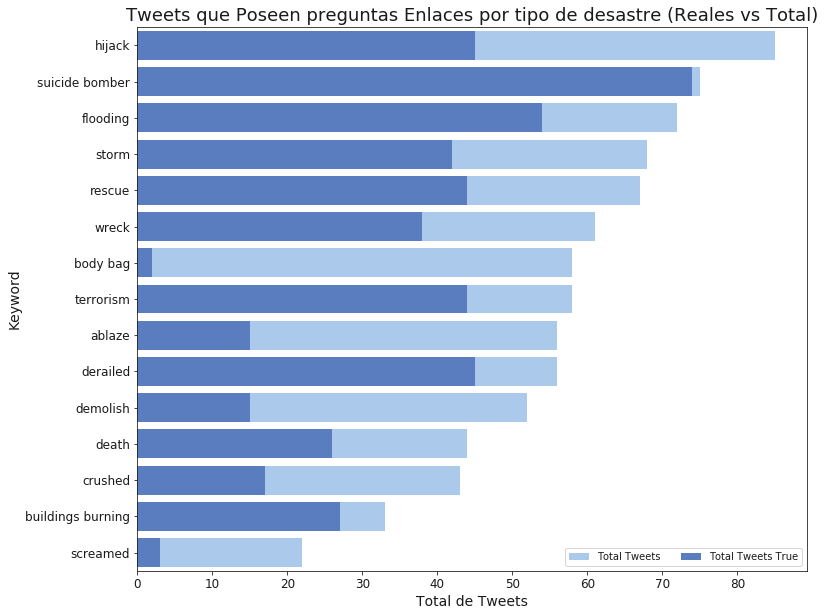

In [49]:
sns.set_color_codes("pastel")
data= tweets_text_key_top.loc[tweets_text_key_top.contain_link == True].groupby(['keyword_grouped']).agg({'text':['count'],'target':['sum']}).reset_index().sort_values(by=('text','count'),ascending=False)
sns.barplot(data = data,y='keyword_grouped',x=('text','count'), color="b",label= 'Total Tweets')

sns.set_color_codes("muted")
ax = sns.barplot(data = data,y='keyword_grouped',x=('target','sum'), color="b",label= 'Total Tweets True')
ax.set_title("Tweets que Poseen preguntas Enlaces por tipo de desastre (Reales vs Total)",fontsize= 18)
ax.set_xlabel("Total de Tweets",fontsize= 14)
ax.set_ylabel("Keyword",fontsize= 14)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="x", labelsize=12)


# ¿Cómo es el "sentimiento" de los textos que poseen un keyword del top 5?

In [50]:
key_list_top = tweets_text_key.keyword_grouped.value_counts().nlargest(5).index
tweets_text_key['keyword_top'] = tweets_text_key.keyword_grouped.transform(lambda x: x in key_list_top)
tweets_text_key["subjectivity_text"]=tweets_text_key.text.transform(subjectivityText)
tweets_text_key["polarity_text"]=tweets_text_key.text.transform(polarityText)
tweets_text_key['target'] = tweets_text_key['target'].transform(lambda x: 'Real' if x == 1 else 'Falso')



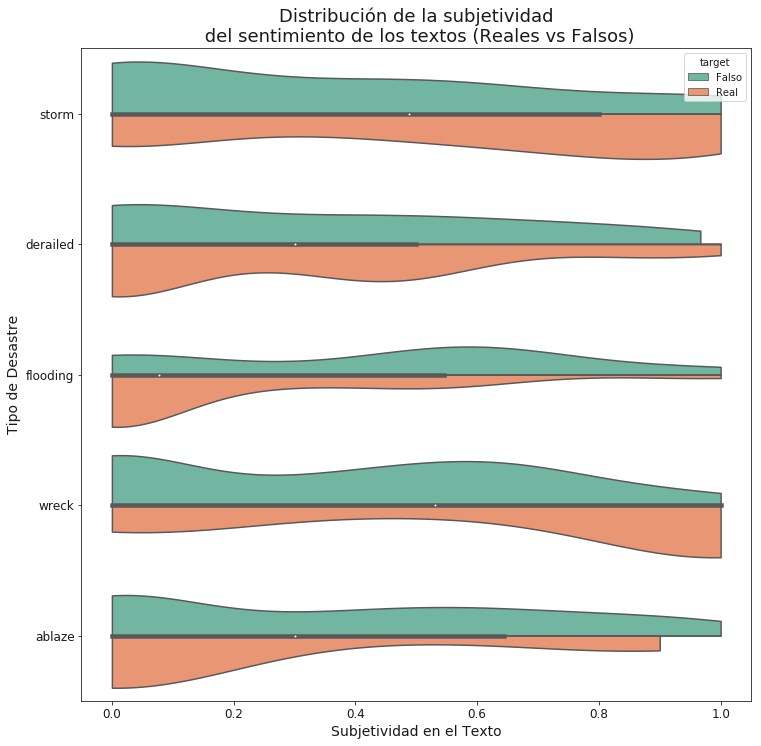

In [51]:
rcParams['figure.figsize'] = 12,12
violin_plt=sns.violinplot(y="keyword_grouped", x="subjectivity_text", hue="target",split=True,data=tweets_text_key.loc[tweets_text_key.keyword_top],cut=0)
violin_plt.set_title("Distribución de la subjetividad\n del sentimiento de los textos (Reales vs Falsos)",fontsize=18)
violin_plt.set_xlabel("Subjetividad en el Texto",fontsize=14)
violin_plt.set_ylabel("Tipo de Desastre",fontsize=14)
violin_plt.tick_params(axis="y", labelsize=12)
violin_plt.tick_params(axis="x", labelsize=12)

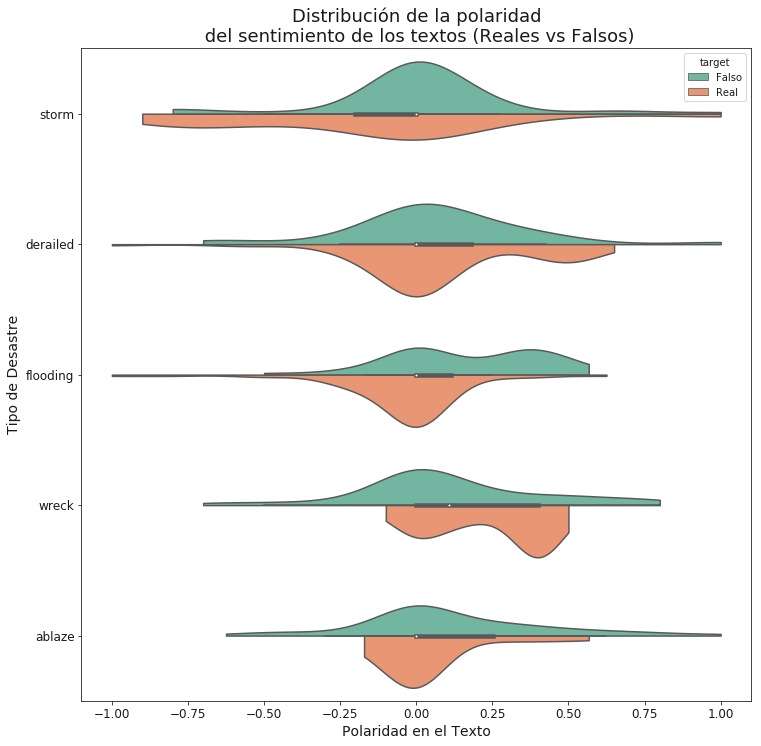

In [52]:
violin_plt=sns.violinplot(y="keyword_grouped", x="polarity_text", hue="target",split=True,data=tweets_text_key.loc[tweets_text_key.keyword_top],cut=0)
violin_plt.set_title("Distribución de la polaridad\n del sentimiento de los textos (Reales vs Falsos)",fontsize=18)
violin_plt.set_xlabel("Polaridad en el Texto",fontsize=14)
violin_plt.set_ylabel("Tipo de Desastre",fontsize=14)
violin_plt.tick_params(axis="y", labelsize=12)
violin_plt.tick_params(axis="x", labelsize=12)


# ¿Cuáles son los paises con mas tweets?

In [53]:
#La transformación de las localidades es muy costosa (3 horas), por lo que se ha generado un .csv con esta columna
#agregada, la misma fue generada a través de la librería geopy.geocoders, el cual para una localidad dada devuelve un 
# objeto de tipo Location el cual posee una dirección, latitud y longitud. Esta herramienta permite agrupar por 
#localidades iguales pero escritas de forma distinta (ejemplo: NYC con new york city)

#tomar en cuenta que una parte de los registros no están ya que o no posee localidad o geocoders no pudo hallar su Location

tweets_location = pd.read_csv('./data/tweets_with_clean_location.csv', encoding='utf-8').sort_values(by=['target'])
tweets_location.loc[:,'keyword'] = tweets_location.loc[:,'keyword'].str.replace("%20", " ")
tweets_location.dropna(subset=['location'],inplace=True)
tweets_location.sample(10)


Unnamed: 0    id    keyword                      location  \
3910        3910  5560  flattened                      New York   
4401        4401  6257  hijacking  IN our hearts  Earth Global    
1265        1265  1823     burned                       germany   
6707        6707  9607    thunder       gamertag: bexrayandvav    
2131        2131  3059     deaths  AsunciÌ_n-PY / TÌ_bingen-GER   
1726        1726  2489   collided    Johannesburg, South Africa   
4741        4741  6744       lava                  HIÛ¢UTÛ¢AS   
4449        4449  6331    hostage               Washington D.C.   
6500        6500  9293    survive           Semarang, Indonesia   
74            74   107   accident                North Carolina   

                                                   text  target  \
3910  100  1' MIX NEW FLAT DOUBLE SIDED LINERLESS BO...       0   
4401  Hijacking Electric Skateboards to Make Them Sa...       0   
1265  I should probably stay away from hot glue guns...       0   
6707  @HaydnExists so glad i saved them all at once ...       1   
2131  Breast milk is the original #superfood but rat...       0   
1726  2 pple have been confirmed dead and over 20 re...       1   
4741                @AmuMumuX lava you.?? quit actin up       0   
4449  Nearly 35 years after their release from capti...       0   
6500  Parental experience may help coral offspring s...       0   
74    I-77 Mile Marker 31 South Mooresville  Iredell...       1   

                             address_latitude_longitude            city  \
3910  ('New York, United States of America', 40.7127...        New York   
4401                                 (None, None, None)             NaN   
1265            ('Deutschland', 51.0834196, 10.4234469)             NaN   
6707                                 (None, None, None)             NaN   
2131                                 (None, None, None)             NaN   
1726  ('Johannesburg, City of Johannesburg Metropoli...    Johannesburg   
4741                                 (None, None, None)             NaN   
4449  ('Washington, District of Columbia, 20500, Uni...      Washington   
6500  ('Semarang, Jawa Tengah, Indonesia', -6.990398...        Semarang   
74    ('North Carolina, United States of America', 3...  North Carolina   

                        country   latitude   longitude  
3910   United States of America  40.712728  -74.006015  
4401                        NaN        NaN         NaN  
1265                        NaN  51.083420   10.423447  
6707                        NaN        NaN         NaN  
2131                        NaN        NaN         NaN  
1726               South Africa -26.205000   28.049722  
4741                        NaN        NaN         NaN  
4449   United States of America  38.894985  -77.036571  
6500                  Indonesia  -6.990399  110.422910  
74     United States of America  35.672964  -79.039292

Text(0,0.5,'Pais')

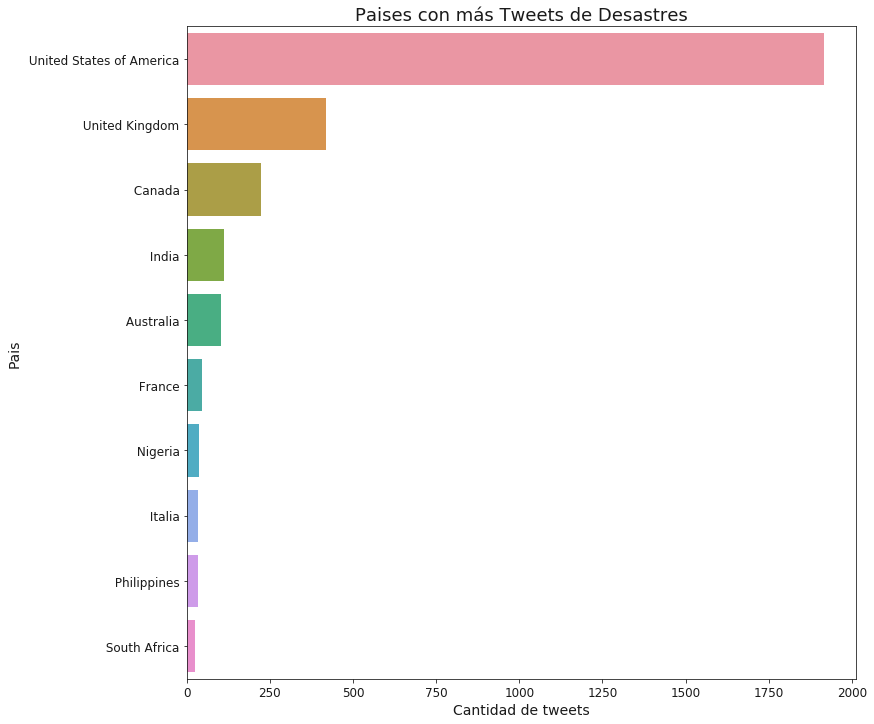

In [54]:
g=sns.barplot(x="country", y="index", data=tweets_location.country.value_counts().nlargest(10).to_frame().reset_index())
g.tick_params(axis="y", labelsize=12)
g.tick_params(axis="x", labelsize=12)
g.set_title('Paises con más Tweets de Desastres', fontsize=18)
g.set_xlabel('Cantidad de tweets', fontsize=14)
g.set_ylabel('Pais', fontsize=14)


In [55]:
fig = go.Figure()

# Recorremos los datos del archivo csv y extraemos sus coordenadas,
# etiquetas a mostrar y especificamos características del marcador
for i in tweets_location:
    fig.add_trace(go.Scattergeo(
            lon = tweets_location['longitude'],
            lat = tweets_location['latitude'],
            marker = dict(
                size = 1,
                color = 'red',
                line_color='white',
                line_width=0.5,
                sizemode = 'area'
        )))
 
# Establecemos las características del mapa base, el título y opciones
# de leyenda, así como la propia proyección del mapa.
fig.update_layout(
    title_text = 'Distribución de los Tweets en el Mundo',
    showlegend = False,
    geo = dict(
        scope='world',
        resolution=110,
        projection_type='mollweide',
        showcoastlines=True,
        showocean=True,
        oceancolor='#132630',
        lakecolor='#132630',
        coastlinecolor='#224354',
        landcolor='#224354',
    )
)
 
# Mostramos la figura creada con las características dadas
fig.show()

# Top 5 países con más de 20 tweets y la cantidad de tweets reales relativo de desastre

In [56]:
count_by_country = tweets_location.groupby(['country']).size().to_frame()
count_by_country.reset_index(inplace=True)
count_by_country.columns = ['country', 'ctry_count']
targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 1].groupby(['country']).size().to_frame()
targeted_tweets_location.reset_index(inplace=True)
targeted_tweets_location.columns = ['country', 'targeted_ctry_count']
count_by_country = count_by_country.merge(targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_targeted_ctry_count'] = (count_by_country.loc[:,'targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count'] ) * 100
top_5_ctry_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_targeted_ctry_count'])



Text(0,0.5,'Pais')

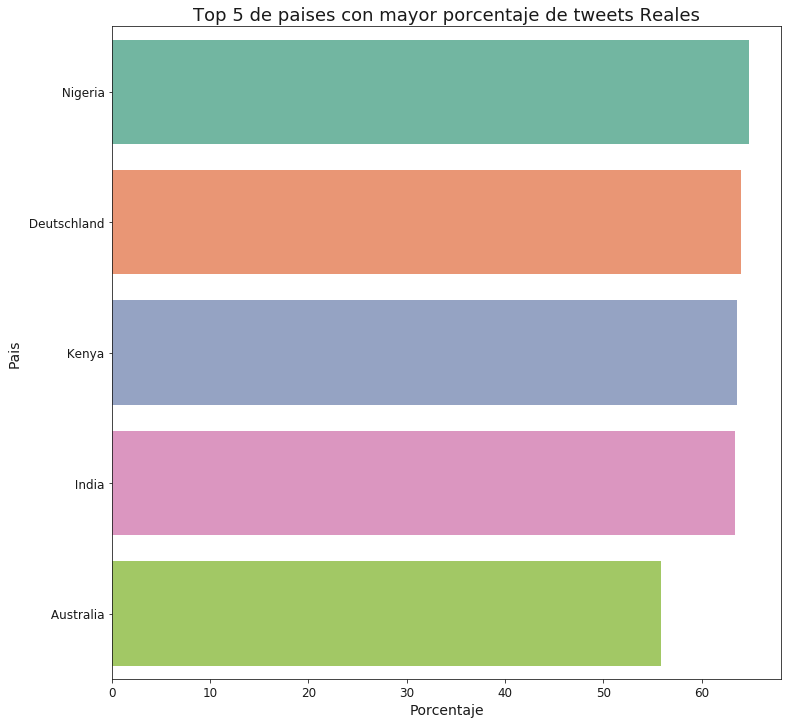

In [57]:
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=top_5_ctry_targeted['relative_targeted_ctry_count'], y=top_5_ctry_targeted['country'],
               orient='h')

g.set_title('Top 5 de paises con mayor porcentaje de tweets Reales', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Pais', fontsize=14)

# Top 5 países con más de 20 tweets y la cantidad de tweets falsos relativo de desastre

In [58]:
not_targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 0].groupby(['country']).size().to_frame()
not_targeted_tweets_location.reset_index(inplace=True)
not_targeted_tweets_location.columns = ['country','not_targeted_ctry_count']
count_by_country = count_by_country.merge(not_targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_not_targeted_ctry_count'] = (count_by_country.loc[:,'not_targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count']*100)

top_5_ctry_not_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_not_targeted_ctry_count'])


Text(0,0.5,'Pais')

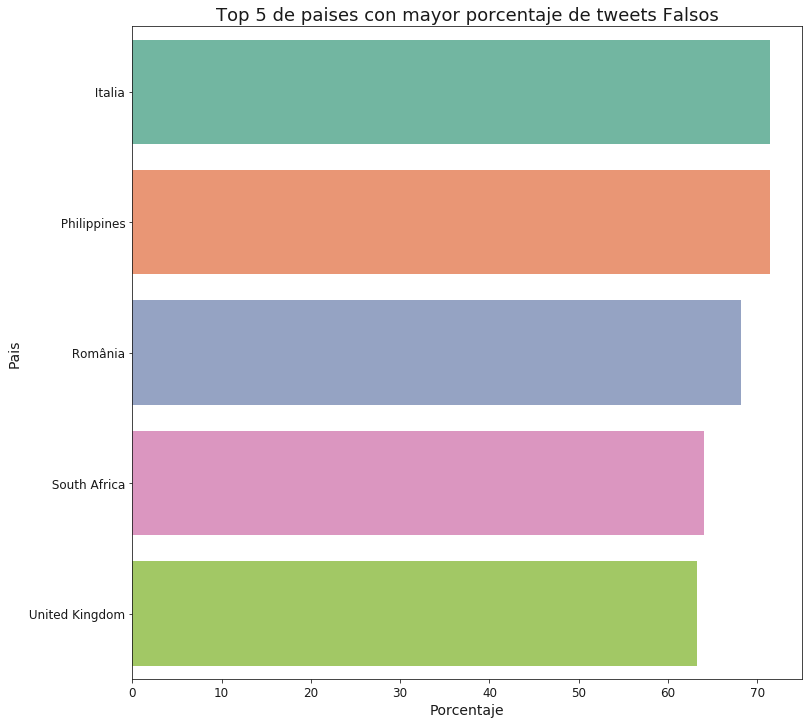

In [59]:
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=top_5_ctry_not_targeted['relative_not_targeted_ctry_count'], y=top_5_ctry_not_targeted['country'],
               orient='h')

g.set_title('Top 5 de paises con mayor porcentaje de tweets Falsos', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Pais', fontsize=14)